# Projeto 2 - Classificação usando dados de Cancer de Mama
## Breast Cancer Coimbra Data Set - UCI

## Introdução

O conjunto de dados de Cancer Mama esta localizado na plataforma UCI no seguinte link - https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra. O objetivo deste conjunto de dados é classificar se um individuo possui ou não cancer de mama a partir destas variaveis obtidas através do exame de sangue.


Segue a descrição das variaveis:
- Age: idade em anos
- BMI: indice de massa corporal (kg/m2)
- Glucose: nivel de glicose no sangue (mg/dL)
- Insulin: nivel de insulina no sangue (µU/mL)
- HOMA: nivel de resistencia a insulina
- Leptin: leptina (ng/mL)
- Adiponectin: Adiponectina (µg/mL)
- Resistin: Resistina (ng/mL)
- MCP-1: nivel de proteina MCP-1 (pg/dL)
- Classification: é classificado como 1 sem cancer (grupo controle) e 2 com cancer (grupo paciente)

Para mais informações, segue o link do artigo: https://bmccancer.biomedcentral.com/articles/10.1186/s12885-017-3877-1

#### referencia: 
Patrício, M., Pereira, J., Crisóstomo, J., Matafome, P., Gomes, M., Seiça, R., & Caramelo, F. (2018). Using Resistin, glucose, age and BMI to predict the presence of breast cancer. BMC Cancer, 18(1).

# Sobre este projeto

Neste projeto treine os conhecimentos aprendidos até o momento e que entenda algumas das dificuldades que pode ter quando for aplicar os mesmos. 

Os principais pontos que serão avaliados:

- Levantamento de hipoteses
- Manipulação de dados e criação de gráficos simples com o `Pandas`
- Criar um modelo usando regressão logistica e justificar

# Preparação do ambiente

- Acessem o link - https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv e faça o download do conjunto de dados.

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
data = pd.read_csv('./dataR2.csv')

In [194]:
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [195]:
data.tail(3)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
113,65,32.05,97,5.73,1.370998,61.48,22.54,10.33,314.05,2
114,72,25.59,82,2.82,0.570392,24.96,33.75,3.27,392.46,2
115,86,27.18,138,19.91,6.777364,90.28,14.11,4.35,90.09,2


In [196]:
data['Classification'] = data['Classification'].apply(lambda x: 'Negativo' if x==1 else 'Positivo')

In [197]:
data.tail()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
111,45,26.85,92,3.33,0.755688,54.68,12.10,10.96,268.23,Positivo
112,62,26.84,100,4.53,1.117400,12.45,21.42,7.32,330.16,Positivo
113,65,32.05,97,5.73,1.370998,61.48,22.54,10.33,314.05,Positivo
114,72,25.59,82,2.82,0.570392,24.96,33.75,3.27,392.46,Positivo
115,86,27.18,138,19.91,6.777364,90.28,14.11,4.35,90.09,Positivo


In [198]:
data.rename({
        'Age': 'Idade', 
        'BMI': 'IMC', 
        'Glucose': 'Glicose', 
        'Insulin': 'Insulina', 
        'HOMA': 'Res_Insulina', 
        'Leptin': 'Leptina', 
        'Adiponectin': 'Adiponectina',
        'Resistin': 'Resistina',
        'Classification': 'Diagnóstico'
    }, axis=1, inplace=True)

In [199]:
data.head()

,Idade,IMC,Glicose,Insulina,Res_Insulina,Leptina,Adiponectina,Resistina,MCP.1,Diagnóstico
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,Negativo
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,Negativo
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,Negativo
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,Negativo
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,Negativo


In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Idade         116 non-null    int64  
 1   IMC           116 non-null    float64
 2   Glicose       116 non-null    int64  
 3   Insulina      116 non-null    float64
 4   Res_Insulina  116 non-null    float64
 5   Leptina       116 non-null    float64
 6   Adiponectina  116 non-null    float64
 7   Resistina     116 non-null    float64
 8   MCP.1         116 non-null    float64
 9   Diagnóstico   116 non-null    object 
dtypes: float64(7), int64(2), object(1)
memory usage: 9.2+ KB


In [202]:
data.describe()

,Idade,IMC,Glicose,Insulina,Res_Insulina,Leptina,Adiponectina,Resistina,MCP.1
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000


# Exercicio 1. (2.0 pontos)

Escreva em até quatro frases, uma breve apresentação sobre suas ideias do conjunto de dados e adicione qualquer contexto que possa ajudar os leitores a entendê-la.

**RESPOSTA** (VALE 2.0 pontos): (responda aqui, dê dois cliques para editar. Esta célula de texto esta escrito em Markdown, para renderizar o texto execute a célula com **Shift+Enter**)

O conjunto de dados apresenta parâmetros cuja obtenção pode ser feita por um simples exame de sangue. Pesquisando sobre as variáveis, descobre-se que são parâmetros de disturbio metabólico que podem ou não ser relacionadas direta ou indiretamente à diabetes. Considerando que diabetes 

# Exercicio 2. (3.0 pontos)

Explore seu conjunto de dados e crie uma história em torno deles! Pense sobre o objetivo que deseja transmitir para seus leitores.

**RESPOSTA** (VALE 0.6 pontos): (responda aqui, dê dois cliques para editar)

Você precisa criar uma visualização explicativa, ajudando o leitor a identificar uma ou mais ideias-chave no conjunto de dados. Assim, qual visualização você acha interessante destacar?

In [203]:
#### VALE 0.6 pontos
#### CONSTRUA OS SEUS GRAFICOS ABAIXO, USE MAIS CELULAS SE NECESSARIO
data['Glicose'].describe()

count    116.000000
mean      97.793103
std       22.525162
min       60.000000
25%       85.750000
50%       92.000000
75%      102.000000
max      201.000000
Name: Glicose, dtype: float64

In [204]:
def is_diabetic(x):
    if x >= 126:
        return 'Diabético'
    elif 100 <= x <= 125:
        return 'Pré-Diabético'
    elif x < 100:
        return 'Normal'

In [205]:
data['diabetes'] = data['Glicose'].apply(is_diabetic)

In [206]:
data.head()

,Idade,IMC,Glicose,Insulina,Res_Insulina,Leptina,Adiponectina,Resistina,MCP.1,Diagnóstico,diabetes
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,Negativo,Normal
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,Negativo,Normal
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,Negativo,Normal
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,Negativo,Normal
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,Negativo,Normal


In [207]:
pd.crosstab(data['diabetes'], data['Diagnóstico'], margins=True)

Diagnóstico,Negativo,Positivo,All
diabetes,,,
Diabético,0,11,11
Normal,44,34,78
Pré-Diabético,8,19,27
All,52,64,116


In [208]:
 df_diabetes_classificacao = pd.crosstab(data['diabetes'], data['Diagnóstico'] )

In [213]:
df_diabetes_classificacao = df_diabetes_classificacao.reindex(["Normal", "Pré-Diabético", "Diabético"])

In [214]:
df_diabetes_classificacao

Diagnóstico,Negativo,Positivo
diabetes,,
Normal,44,34
Pré-Diabético,8,19
Diabético,0,11


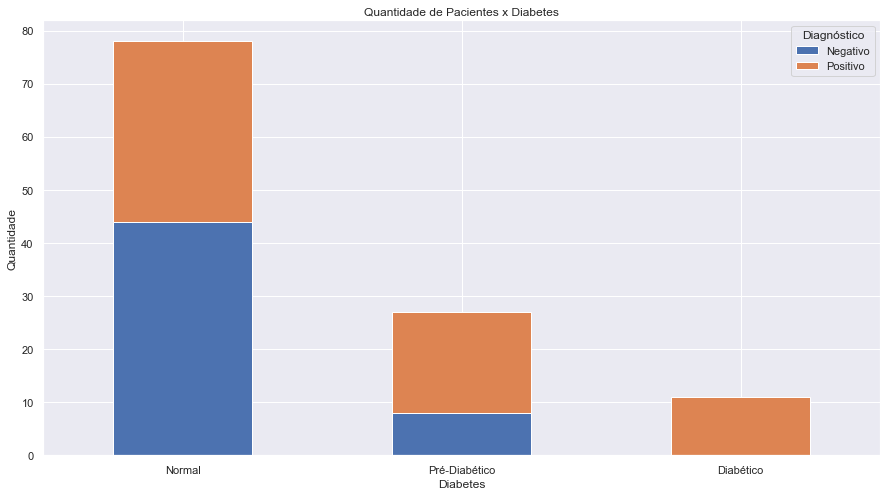

In [218]:
df_diabetes_classificacao.plot(kind="bar", stacked=True, rot=0)
sns.set(rc = {'figure.figsize':(15,8)})
plt.title('Quantidade de Pacientes x Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Quantidade')
plt.legend(title='Diagnóstico', loc='upper right', labels=['Negativo', 'Positivo'])

In [13]:
def classificate_imc(x):
    if x <= 18.5:  # baixo peso
        return -1  
    elif 18.5 < x < 25:  # peso normal
        return 0
    elif 25 <= x < 30:  # sobrepeso
        return 1
    elif 30 <= x < 35:  # obesidade
        return 2
    elif 35 <= x < 40:  # obesidade grave
        return 3
    elif x >= 40:  # obesidade mórbida
        return 4

In [14]:
data['imc_class'] = data['IMC'].apply(classificate_imc)

In [15]:
df = pd.crosstab(data['Classificação'], data['imc_class'], margins=True)
df

imc_class,-1,0,1,2,3,All
Classificação,,,,,,
1,0,17,14,12,9,52
2,1,22,23,15,3,64
All,1,39,37,27,12,116


In [16]:
df.columns

Index([-1, 0, 1, 2, 3, 'All'], dtype='object', name='imc_class')

Obtenha o feedback de suas ideias e de sua(s) visualização(ões), se possivel apresente esse grafico com pelo menos uma outra pessoa e questione:

1. O que você percebe na visualização?
2. Quais perguntas você tem sobre o conjunto de dados?
3. Há algo que você não entende nas visualizações?

**RESPOSTA** (VALE 0.6 pontos): (responda aqui, dê dois cliques para editar)

Após o feedback, o que você mudaria?

**RESPOSTA** (VALE 0.6 pontos): (responda aqui, dê dois cliques para editar)

Apresente suas nova(s) visualização(ões) a partir do feedback:

In [17]:
#### VALE 0.6 pontos
#### CONSTRUA O SEU GRAFICO ABAIXO, USE MAIS CELULAS SE NECESSARIO

#.
#.
#.

# Exercicio 3. (5.0 pontos)

Construa um modelo de regressão logistica para predizer a variável **Classification** com **statsmodels.api**.

In [18]:
#### VALE 0.8 pontos
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

#.
#.
#.

Coloque abaixo a saida do seu modelo usando **seu_modelo.summary()**.

In [19]:
#### VALE 0.8 pontos
#### EXECUTE O COMANDO ABAIXO

#.

Faça outro modelo usando a biblioteca **sklearn** e usem o parametro **random_state** com valor 10.

In [20]:
#### VALE 0.8 pontos
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

#.
#.
#.

Coloque abaixo a matriz de confusão do modelo feito:

In [21]:
#### VALE 0.8 pontos
#### EXECUTE O COMANDO ABAIXO

#.

Prencha as métricas a partir da matriz de confusão obtida (lembrando que a classe negativa é 1 - sem cancer e a classe positiva é 2 - com cancer)

In [22]:
# VALE 0.8 pontos
# Substitua __ pelos valores solicitados
print('acurácia: {}'.format('__'))
print('precisão: {}'.format('__'))
print('especificidade: {}'.format('__'))
print('sensitividade: {}'.format('__'))

acurácia: __
precisão: __
especificidade: __
sensitividade: __


Observando a matriz de confusão, o seu modelo tende a obter mais erros do tipo I ou do tipo II?

**RESPOSTA** (VALE 1.0 ponto): (responda aqui, dê dois cliques para editar)